In [ ]:
import numpy as np
import torch as t

In [91]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = np.zeros(shape=(num_epochs, 2))
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines[i] = [-W[0]/W[1], -b/W[1]]

    return boundary_lines


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

data = pd.read_csv("data.csv")
data.columns = ['X','Y','Label']

# 1. 获取数据表的行列，并打印。
print(type(data))
print("shape = \n", data.shape)
print("total elements \n", data.size)
print("dimension \n", data.ndim)

#2. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
data.head()

<class 'pandas.core.frame.DataFrame'>
shape = 
 (99, 3)
total elements 
 297
dimension 
 2


,X,Y,Label
0,0.28774,0.29139,1
1,0.40714,0.17878,1
2,0.29230,0.42170,1
3,0.50922,0.35256,1
4,0.27785,0.10802,1


In [83]:
X = np.array(pd.DataFrame(data, columns = ['X', 'Y']))
y = np.array(pd.DataFrame(data, columns = ['Label']))

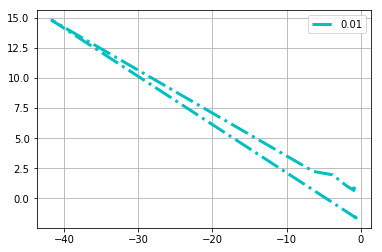

In [113]:
boundary_lines = trainPerceptronAlgorithm(X, y, 0.01, 30)
# plot lines
plt.plot(boundary_lines[:,0], boundary_lines[:,1], 'c-.',linewidth=3)
# Creates gridlines for only major tick marks
plt.grid(b=True, which='major')
plt.legend(['0.01'])
plt.show()
